<a href="https://colab.research.google.com/github/chesterhuynguyen/huynguyen_INFO5731_Fall2023/blob/main/Huy_Nguyen_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [9]:
from google.colab import files
uploaded = files.upload()


In [18]:
import pandas as pd
from nltk import ngrams, FreqDist
from nltk.tokenize import word_tokenize
from collections import Counter

# Load the dataset & Cleaned_Review column
df = pd.read_csv('Reviews.csv')
cleaned_reviews = df['Cleaned_Review']

# Function to generate N-grams
def generate_ngrams(text, n):
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in n_grams]

# Function to count the frequency of N-grams
def count_ngram_frequency(texts, n):
    ngram_list = [generate_ngrams(text, n) for text in texts]
    ngrams_flat = [gram for sublist in ngram_list for gram in sublist]
    return Counter(ngrams_flat)

# Set the value of N
N = 3

# Count the frequency of N-grams
ngram_frequency = count_ngram_frequency(cleaned_reviews, N)

# Display the results
print(f"Top 10 {N}-grams and their frequencies:")
for ngram, frequency in ngram_frequency.items():
    print(f"{ngram}: {frequency}")


Top 10 3-grams and their frequencies:
i conflicted film: 40
conflicted film review: 40
film review good: 40
review good there: 40
good there heartfelt: 40
there heartfelt tribute: 40
heartfelt tribute obviously: 40
tribute obviously actor: 40
obviously actor played: 40
actor played the: 40
played the emotion: 40
the emotion shown: 40
emotion shown feel: 40
shown feel real: 40
feel real manage: 40
real manage the: 40
manage the performance: 40
the performance good: 40
performance good angela: 40
good angela bassett: 40
angela bassett stand: 40
bassett stand one: 40
stand one oppose: 40
one oppose replacement: 40
oppose replacement atlantis: 40
replacement atlantis give: 40
atlantis give another: 40
give another excellent: 40
another excellent excuse: 40
excellent excuse show: 40
excuse show content: 40
show content derives: 40
content derives universal: 40
derives universal culture: 40
universal culture gigantic: 40
culture gigantic product: 40
gigantic product like: 40
product like mcu

In [17]:
import pandas as pd
from nltk import bigrams, FreqDist
from nltk.tokenize import word_tokenize
from collections import Counter

# Load the dataset
df = pd.read_csv('Reviews.csv')
cleaned_reviews = df['Cleaned_Review']

# Function to generate bigrams
def generate_bigrams(text):
    tokens = word_tokenize(text)
    return list(bigrams(tokens))

# Function to count the frequency of bigrams
def count_bigram_frequency(texts):
    bigram_list = [generate_bigrams(text) for text in texts]
    bigrams_flat = [bigram for sublist in bigram_list for bigram in sublist]
    return Counter(bigrams_flat)

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(texts):
    bigram_frequency = count_bigram_frequency(texts)
    unigram_frequency = Counter(word_tokenize(' '.join(texts)))

    bigram_probabilities = {}
    for bigram, count in bigram_frequency.items():
        w2, w1 = bigram
        probability = count / unigram_frequency[w1]
        bigram_probabilities[bigram] = probability

    return bigram_probabilities

# Calculate bigram probabilities
bigram_probabilities = calculate_bigram_probabilities(cleaned_reviews)

# Display all bigrams and their probabilities
for bigram, probability in sorted(bigram_probabilities.items(), key=lambda x: x[1], reverse=True):
    print(f"{bigram}: {probability:.4f}")


('i', 'conflicted'): 1.0000
('film', 'review'): 1.0000
('there', 'heartfelt'): 1.0000
('angela', 'bassett'): 1.0000
('bassett', 'stand'): 1.0000
('one', 'oppose'): 1.0000
('content', 'derives'): 1.0000
('derives', 'universal'): 1.0000
('culture', 'gigantic'): 1.0000
('addition', 'rank'): 1.0000
('marvel', 'superheroes'): 1.0000
('superheroes', 'immediately'): 1.0000
('powerful', 'capable'): 1.0000
('accustomed', 'wardrobe'): 1.0000
('effort', 'meaning'): 1.0000
('behind', 'successfully'): 1.0000
('try', 'mix'): 1.0000
('feel', 'light'): 1.0000
('studio', 'fall'): 1.0000
('fall', 'flat'): 1.0000
('like', 'mere'): 1.0000
('really', 'weight'): 1.0000
('weight', 'except'): 1.0000
('well', 'abusing'): 1.0000
('drama', 'whenever'): 1.0000
('story', 'devoured'): 1.0000
('devoured', 'secondary'): 1.0000
('character', 'relegated'): 1.0000
('relegated', 'background'): 1.0000
('pretty', 'monotonous'): 1.0000
('information', 'happening'): 1.0000
('happening', 'fast'): 1.0000
('fully', 'appreciate'

In [36]:
import nltk
from nltk import pos_tag, word_tokenize, RegexpParser

# Load the dataset
df = pd.read_csv('Reviews.csv')
cleaned_reviews = df['Cleaned_Review']

# Define a grammar for noun phrases
grammar = r"""
    NP: {<DT|JJ|NN.*>+}  # Chunk sequences of DT, JJ, and NN
"""

# Function to extract noun phrases from a sentence
def extract_noun_phrases(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    parser = RegexpParser(grammar)
    tree = parser.parse(tagged_tokens)

# Extract noun phrases from the tree
    noun_phrases = [' '.join([word for word, tag in subtree.leaves()]) for subtree in tree.subtrees() if subtree.label() == 'NP']
    return noun_phrases

# Extract noun phrases for each review
df['noun_phrases'] = df['Cleaned_Review'].apply(extract_noun_phrases)

# Calculate the frequency of each noun phrase in the whole dataset
all_noun_phrases = [phrase for phrases in df['noun_phrases'] for phrase in phrases]
noun_phrase_counts = Counter(all_noun_phrases)

# Calculate the relative probabilities for each review
for index, row in df.iterrows():
    review_noun_phrases = row['noun_phrases']
    max_frequency = max([noun_phrase_counts[phrase] for phrase in review_noun_phrases])

# Display the results
    print(f"Review {index + 1}:")
    for phrase in review_noun_phrases:
        frequency = noun_phrase_counts[phrase]
        relative_probability = frequency / max_frequency
        print(f"  Noun Phrase: {phrase}, Relative Probability: {relative_probability:.2f}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Streaming output truncated to the last 5000 lines.
  Noun Phrase: character continue, Relative Probability: 0.02
  Noun Phrase: tough decision, Relative Probability: 0.02
  Noun Phrase: death character film, Relative Probability: 0.02
  Noun Phrase: i, Relative Probability: 1.00
  Noun Phrase: impossible task, Relative Probability: 0.02
  Noun Phrase: sequel, Relative Probability: 0.05
  Noun Phrase: character entire, Relative Probability: 0.02
  Noun Phrase: black wakanda i, Relative Probability: 0.02
  Noun Phrase: film emotional, Relative Probability: 0.02
  Noun Phrase: year event black panther accordance event infinity war film, Relative Probability: 0.02
  Noun Phrase: loss country, Relative Probability: 0.02
  Noun Phrase: emergence namor underwater city talokan, Relative Probability: 0.02
  Noun Phrase: character, Relative Probability: 0.11
  Noun Phrase: protect shuri, Relative Probability: 0.02
  Noun Phrase: screentime burden, Relative Probability: 0.02
  Noun Phrase: franch

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [21]:
pip install scikit-learn


In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
df = pd.read_csv('Reviews.csv')
cleaned_reviews = df['Cleaned_Review']

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_reviews)

# Convert the tf-idf matrix to a DataFrame for better visualization
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the resulting tf-idf matrix
print(df_tfidf)


     30th      able  absence  absolutely  abundance   abusing  accept  \
0     0.0  0.000000      0.0         0.0        0.0  0.091741     0.0   
1     0.0  0.045387      0.0         0.0        0.0  0.000000     0.0   
2     0.0  0.000000      0.0         0.0        0.0  0.000000     0.0   
3     0.0  0.000000      0.0         0.0        0.0  0.000000     0.0   
4     0.0  0.000000      0.0         0.0        0.0  0.000000     0.0   
..    ...       ...      ...         ...        ...       ...     ...   
995   0.0  0.000000      0.0         0.0        0.0  0.000000     0.0   
996   0.0  0.057383      0.0         0.0        0.0  0.000000     0.0   
997   0.0  0.000000      0.0         0.0        0.0  0.000000     0.0   
998   0.0  0.000000      0.0         0.0        0.0  0.000000     0.0   
999   0.0  0.000000      0.0         0.0        0.0  0.000000     0.0   

     accepted    access  accordance  ...   writing   written     wrong  \
0    0.000000  0.000000         0.0  ...  0.06807

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
df = pd.read_csv('Reviews.csv')
cleaned_reviews = df['Cleaned_Review']

# Define the query
query = "The best Marvel movie"

# Combine the query with the cleaned reviews
documents = [query] + list(cleaned_reviews)

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Calculate cosine similarity between the query and documents
cosine_similarities = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1:]).flatten()

# Create a DataFrame to store document rankings
df_rankings = pd.DataFrame({'Document': range(1, len(cleaned_reviews) + 1), 'Cosine Similarity': cosine_similarities})

# Sort the DataFrame by cosine similarity in descending order
df_rankings = df_rankings.sort_values(by='Cosine Similarity', ascending=False)

# Display the document rankings
print("Document Rankings:")
print(df_rankings)


Document Rankings:
     Document  Cosine Similarity
831       832           0.219048
31         32           0.219048
381       382           0.219048
181       182           0.219048
406       407           0.219048
..        ...                ...
272       273           0.000000
347       348           0.000000
522       523           0.000000
972       973           0.000000
947       948           0.000000

[1000 rows x 2 columns]


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

['i', 'film', 'movie', 'black', 'wakanda', 'the', 'character', 'really', 'like', 'marvel', 'would', 'think', 'panther', 'feel', 'good', 'one', 'namor', 'story', 'mcu', 'phase', 'also', 'felt', 'it', 'action', 'much', 'great', 'first', 'still', 'scene', 'way', 'see', 'get', 'thought', 'chadwick', 'forever', 'well', 'time', 'could', 'even', 'death', 'shuri', 'people', 'a', 'actor', 'best', 'never', 'without', 'place', 'underwater', 'this', 'new', 'plot', 'made', 'sequel', 'give', 'pretty', 'emotional', 'lot', 'hard', 'take', 'passing', 'found', 'got', 'not', 'interesting', 'make', 'there', 'boseman', 'angela', 'point', 'war', 'fact', 'something', 'work', 'little', 'better', 'main', 'they', 'thing', 'franchise', 'cinematic', 'already', 'part', 'big', 'enough', 'whole', 'moment', 'lead', 'audience', 'two', 'and', 'king', 'together', 'nothing', 'riri', 'bad', 'end', 'come', 'seemed', 'show', 'rest', 'though', 'but', 'year', 'she', 'look', 'sequence', 'many', 'director', 'three', 'may', 'opp

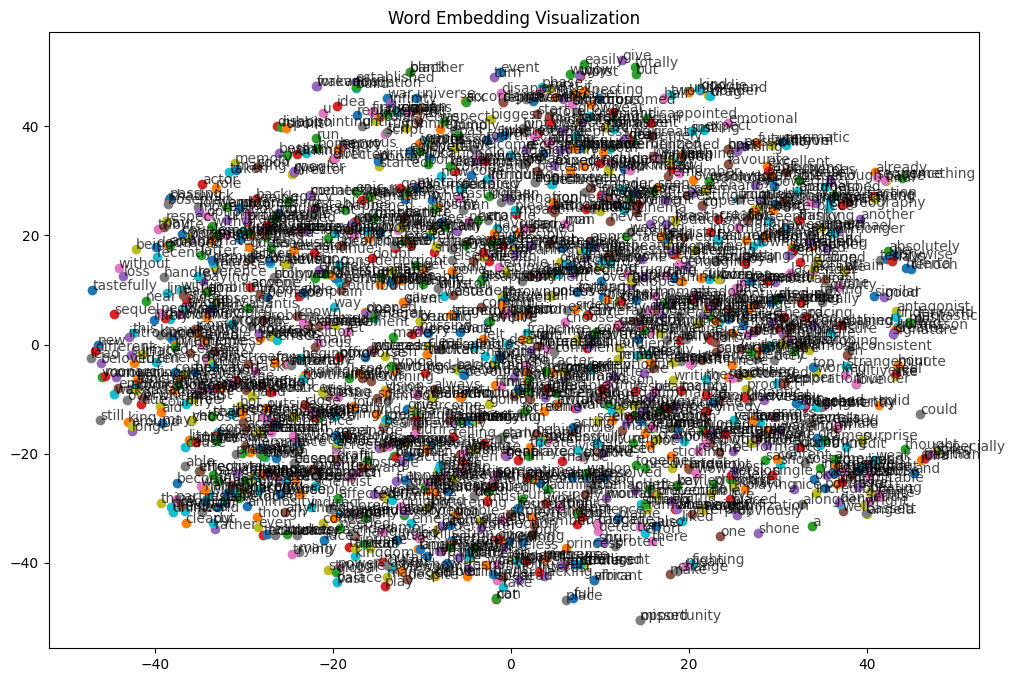

In [35]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('Reviews.csv')
cleaned_reviews = df['Cleaned_Review']

# Tokenize the cleaned reviews into words
tokenized_reviews = [word_tokenize(review) for review in cleaned_reviews]

# Train a Word2Vec model
model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4)

# Extracting words from the model's vocabulary
words = list(model.wv.index_to_key)

# Printing the list of words
print(words)

# Extracting word vectors
word_vectors = np.array([model.wv[word] for word in words])

# Applying t-SNE for dimensionality reduction to 2D
tsne_model = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne_model.fit_transform(word_vectors)

# Creating a DataFrame for visualization
df_visualization = pd.DataFrame({'word': words, 'x': word_vectors_2d[:, 0], 'y': word_vectors_2d[:, 1]})

# Plotting the word embeddings
plt.figure(figsize=(12, 8))
for i, row in df_visualization.iterrows():
    plt.scatter(row['x'], row['y'])
    plt.annotate(row['word'], (row['x'], row['y']), alpha=0.7)

plt.title('Word Embedding Visualization')
plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file



# Link:
https://github.com/chesterhuynguyen/huynguyen_INFO5731_Fall2023/blob/main/Reviews.csv


